# Cross-sectional Example

This notebooks demonstrates how DataComp methods for a cross-sectional comparison can be applied. 
The underlying data was simulated using another notebook (

# Imports

In [1]:
import datacomp as dc

# Data setup

In [2]:
# load Data
datacol = dc.get_data("data/simulated.csv", ["Dataset1", "Dataset2", "Dataset3"], ["CATSIG1", "CATNON2", "NAN1"], "DATASET")

# compare only baseline data
datacol.reduce_dfs_to_value("TIME", 0)

# exlude following features from comparison
exclude_feats = ["TIME", "DATASET", "ENTITY"]

# Visualize feature overlap

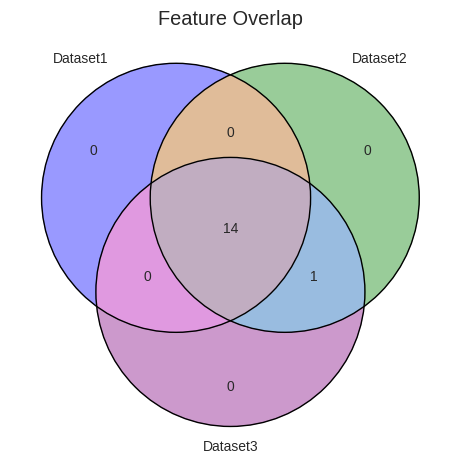

In [3]:
datacol.feat_venn_diagram()

# Statistical comparison

In [4]:
datacol.update_categorical_feats()
datacol.categorical_feats

['CATNON2', 'CATSIG1']

In [5]:
# sorting by index because by default the resulting dataframe will be sorted 
# based on signficance. This can be hard to read if multiple datasets are 
# involved
results = datacol.analyze_feature_ranges(exclude=exclude_feats).sort_index()
results

Fraction of significant comparisons: 20/33


p-value   cor_p-value  signf  Dataset1  Dataset2  \
features datasets                                                           
BATCH1   (1, 2)     7.764258e-01  8.855486e-01  False       240       240   
         (1, 3)     2.544379e-70  0.000000e+00   True       240       240   
         (2, 3)     1.532594e-72  0.000000e+00   True       240       240   
BATCH2   (1, 2)     8.995161e-02  4.830466e-01  False       240       240   
         (1, 3)     3.605956e-52  0.000000e+00   True       240       240   
         (2, 3)     6.866497e-57  0.000000e+00   True       240       240   
CATNON2  (1, 2)     1.826635e-01  6.352422e-01  False       240       240   
         (1, 3)     4.554928e-04  6.810651e-03   True       240       240   
         (2, 3)     9.519974e-03  1.084439e-01  False       240       240   
CATSIG1  (1, 2)     4.882547e-55  0.000000e+00   True       240       240   
         (1, 3)     0.000000e+00  0.000000e+00   True       240       240   
         (2, 3)    8.683251e-182  0.000000e+00   True       240       240   
CHIFEAT  (1, 2)     4.217265e-12  8.012857e-11   True       240       240   
         (1, 3)     2.063093e-19  0.000000e+00   True       240       240   
         (2, 3)     5.841588e-03  7.333514e-02  False       240       240   
FEAT1    (1, 2)     4.351614e-05  6.960311e-04   True       240       240   
         (1, 3)     1.178741e-08  2.121734e-07   True       240       240   
         (2, 3)     1.055483e-01  4.879158e-01  False       240       240   
LONG1    (1, 2)     1.523150e-02  1.553523e-01  False       240       240   
         (1, 3)     6.428332e-02  4.500802e-01  False       240       240   
         (2, 3)     2.109805e-05  3.586064e-04   True       240       240   
NDNON1   (1, 2)     6.445845e-02  4.500802e-01  False       240       240   
         (1, 3)     5.144802e-01  8.855486e-01  False       240       240   
         (2, 3)     3.147477e-01  7.795034e-01  False       240       240   
NDNON2   (1, 2)     2.523961e-03  3.476156e-02   True       240       240   
         (1, 3)     6.433454e-01  8.855486e-01  False       240       240   
         (2, 3)     1.979024e-02  1.811767e-01  False       240       240   
NDSIG1   (1, 2)     1.180456e-14  2.353673e-13   True       240       240   
         (1, 3)     5.326916e-64  0.000000e+00   True       240       240   
         (2, 3)     1.663875e-47  0.000000e+00   True       240       240   
NDSIG2   (1, 2)     2.187762e-77  0.000000e+00   True       240       240   
         (1, 3)     1.354732e-72  0.000000e+00   True       240       240   
         (2, 3)     4.042142e-71  0.000000e+00   True       240       240   

                   Dataset3  
features datasets            
BATCH1   (1, 2)         198  
         (1, 3)         198  
         (2, 3)         198  
BATCH2   (1, 2)         198  
         (1, 3)         198  
         (2, 3)         198  
CATNON2  (1, 2)         198  
         (1, 3)         198  
         (2, 3)         198  
CATSIG1  (1, 2)         198  
         (1, 3)         198  
         (2, 3)         198  
CHIFEAT  (1, 2)         198  
         (1, 3)         198  
         (2, 3)         198  
FEAT1    (1, 2)         198  
         (1, 3)         198  
         (2, 3)         198  
LONG1    (1, 2)         198  
         (1, 3)         198  
         (2, 3)         198  
NDNON1   (1, 2)         198  
         (1, 3)         198  
         (2, 3)         198  
NDNON2   (1, 2)         198  
         (1, 3)         198  
         (2, 3)         198  
NDSIG1   (1, 2)         198  
         (1, 3)         198  
         (2, 3)         198  
NDSIG2   (1, 2)         198  
         (1, 3)         198  
         (2, 3)         198

print(results.to_latex())

# Visualization of significant deviations

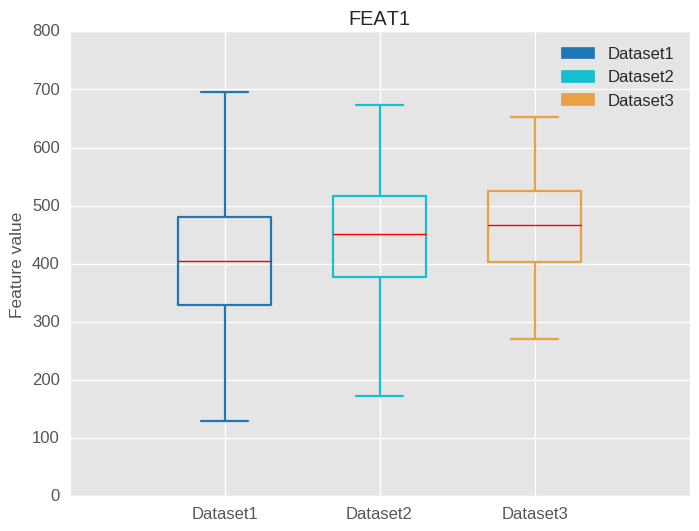

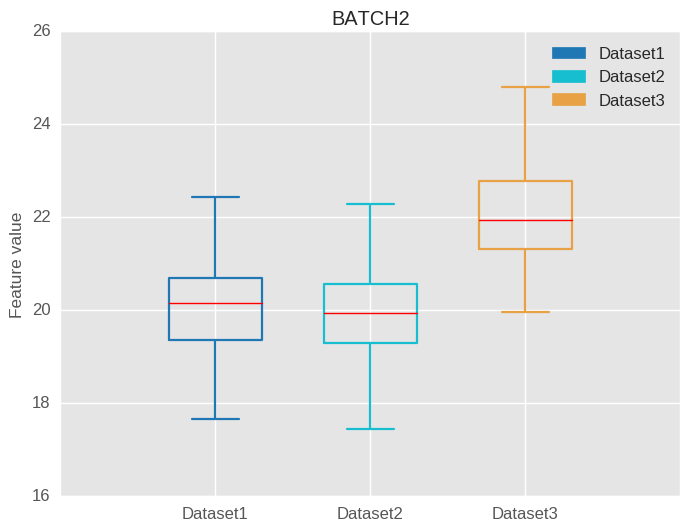

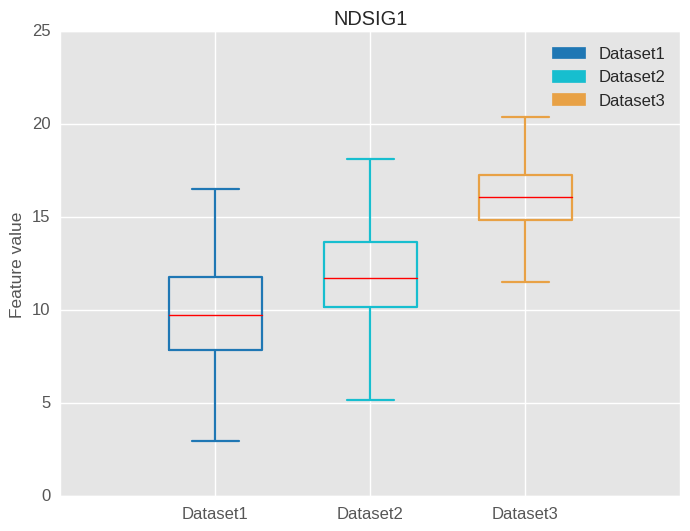

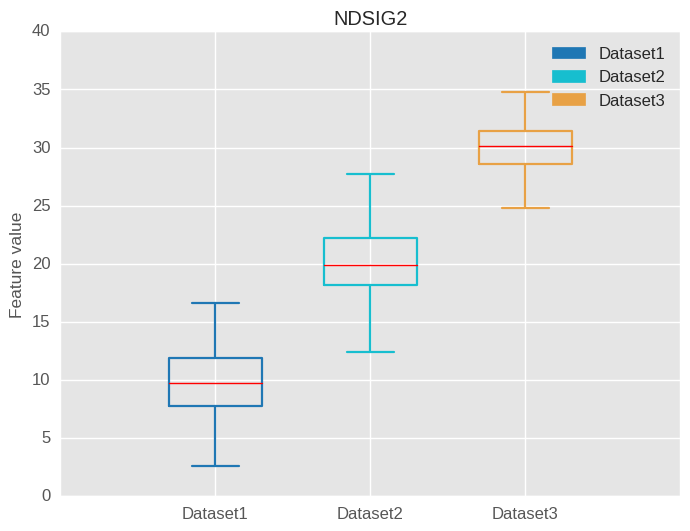

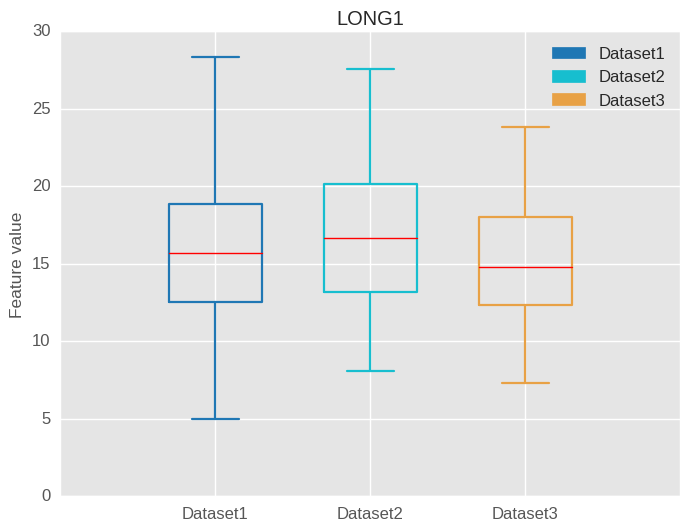

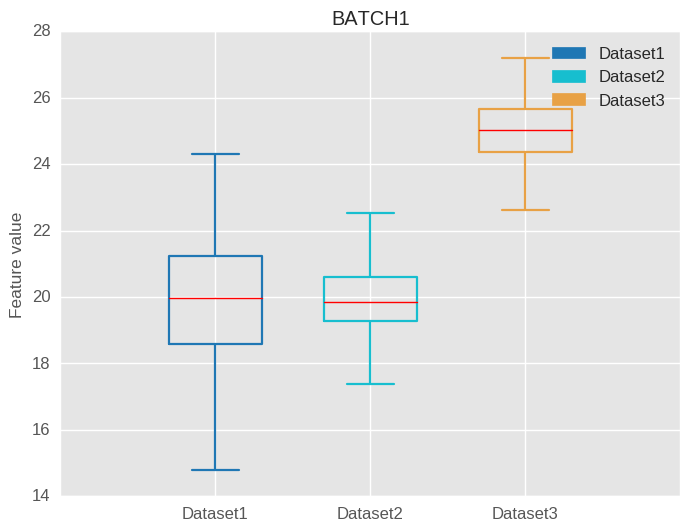

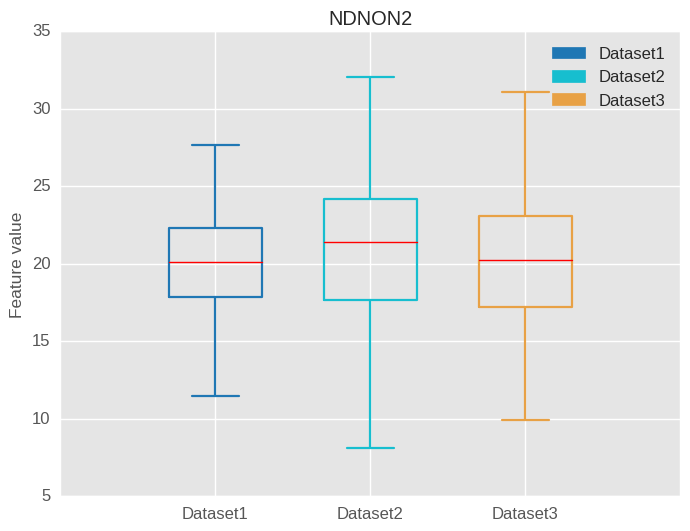

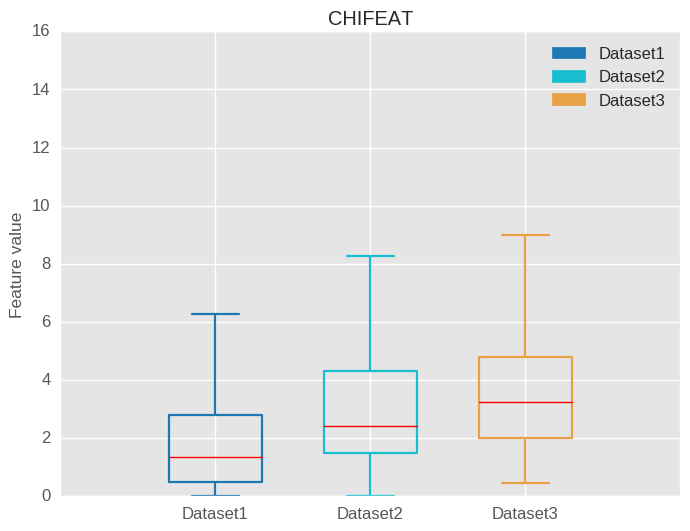

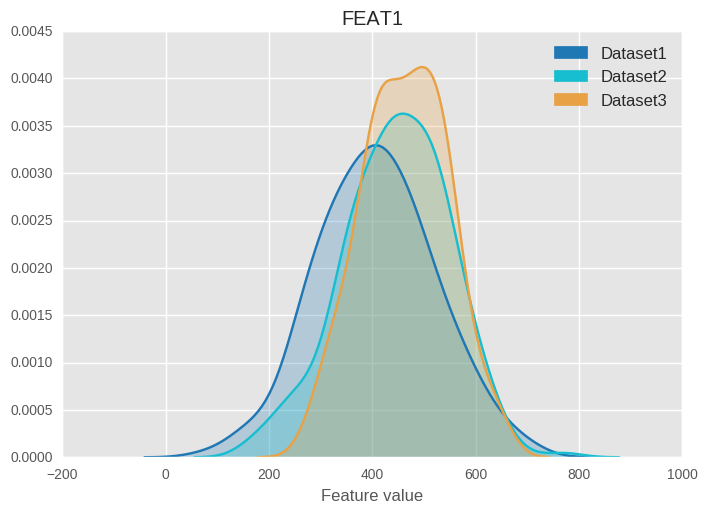

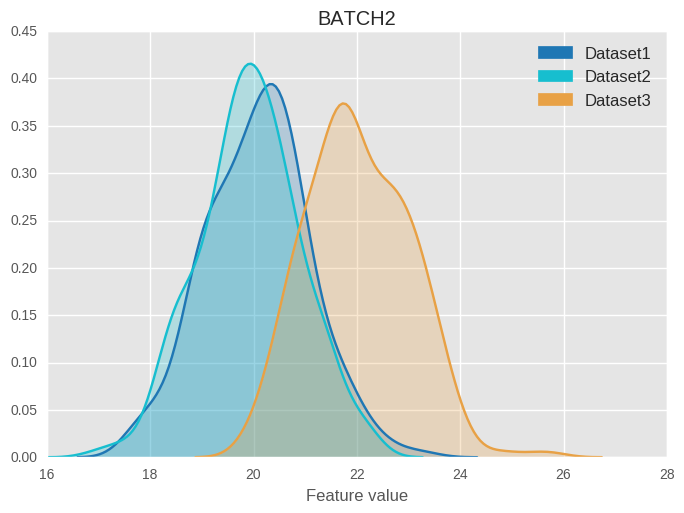

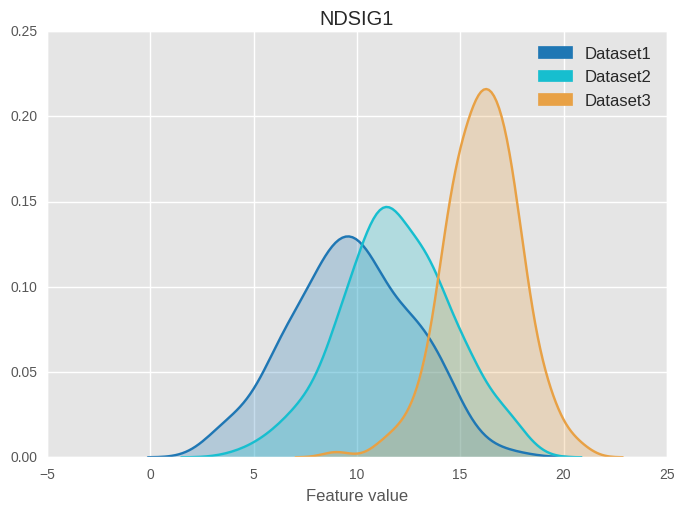

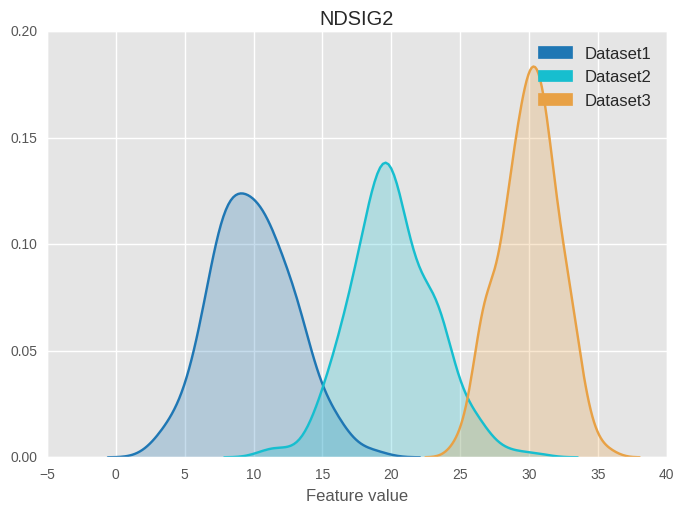

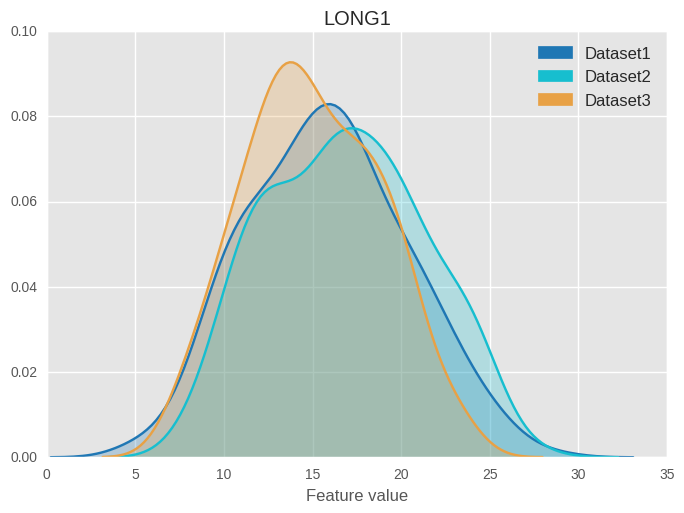

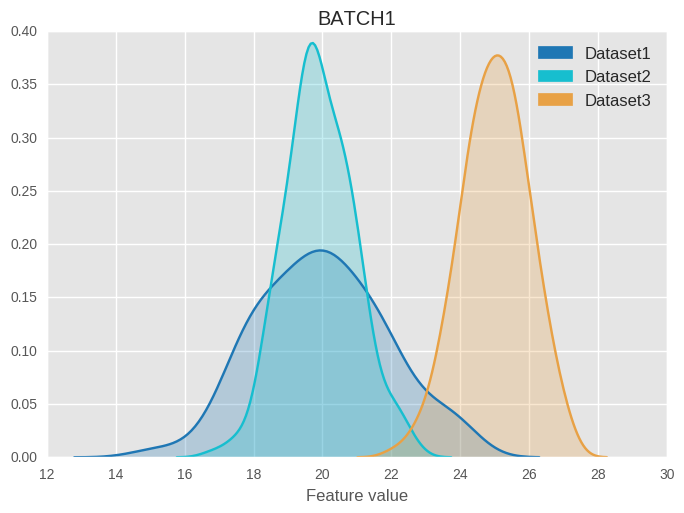

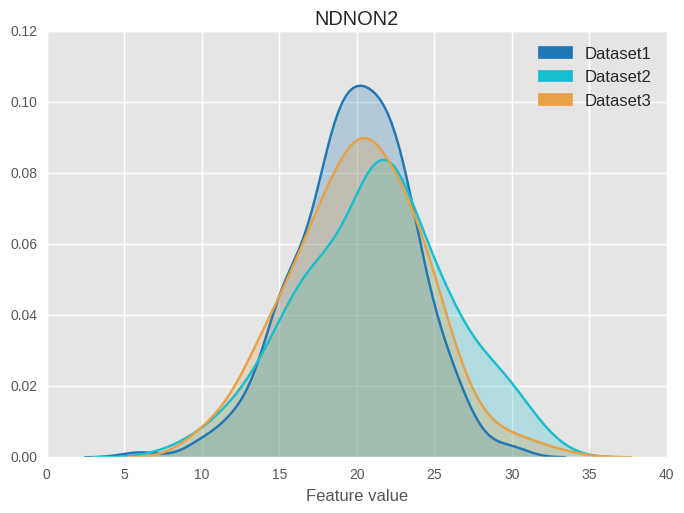

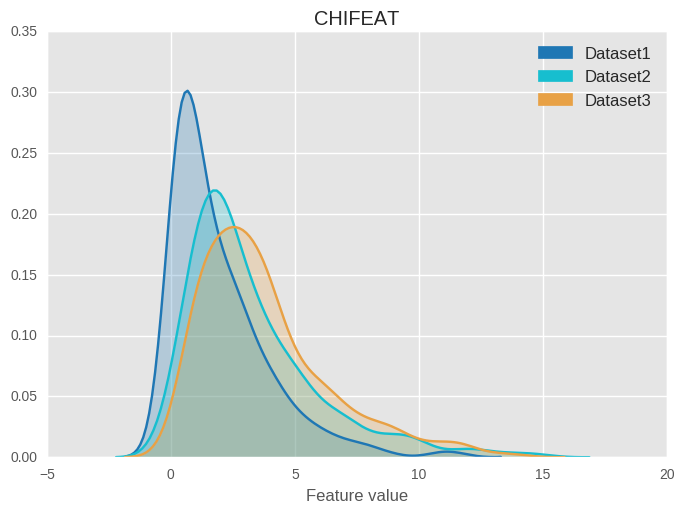

In [10]:
dc.plot_sig_num_feats(datacol, results, kdeplot=False)

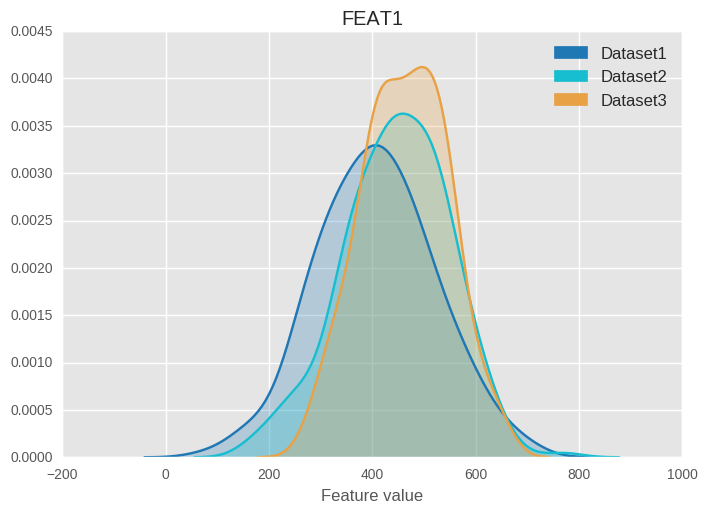

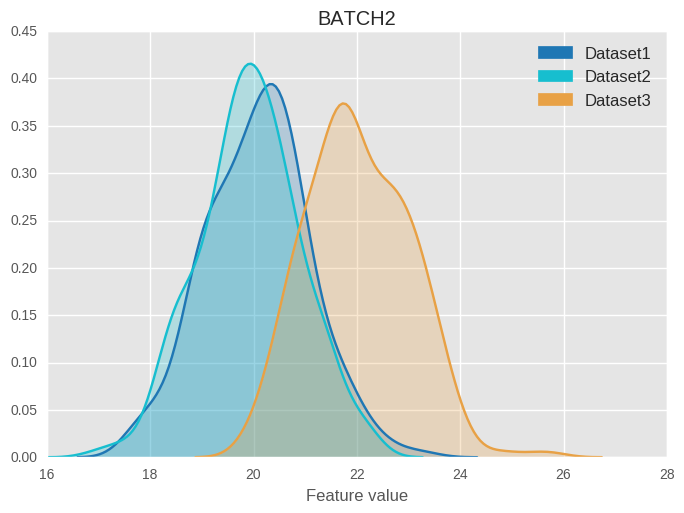

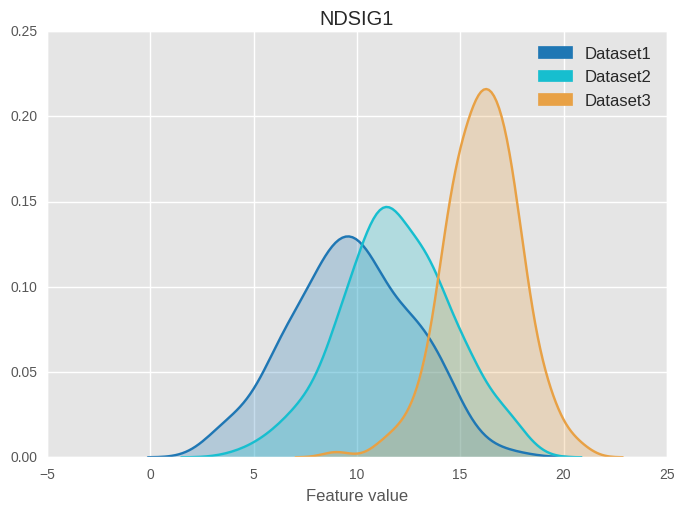

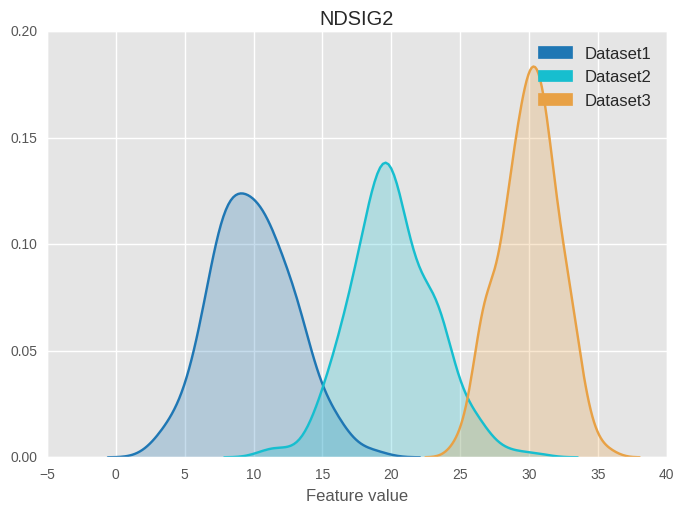

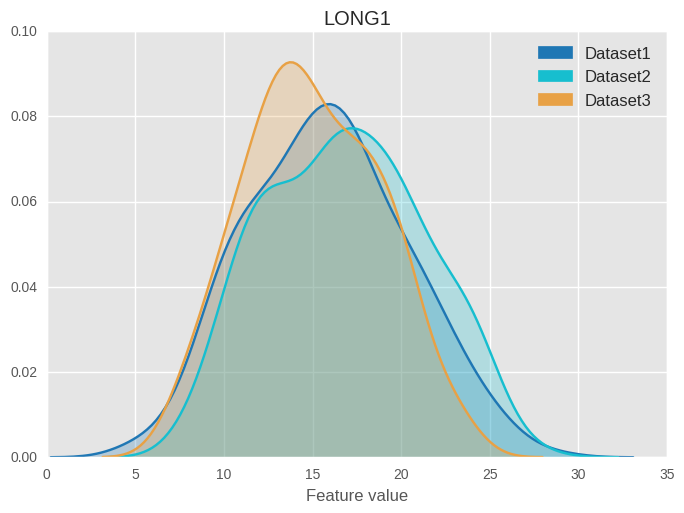

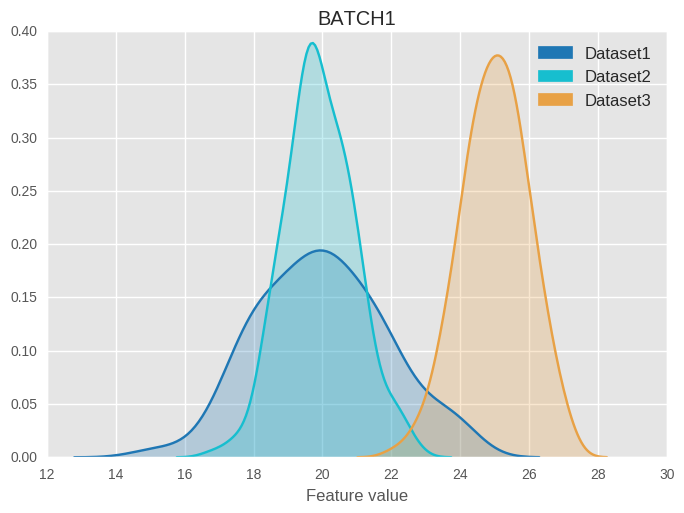

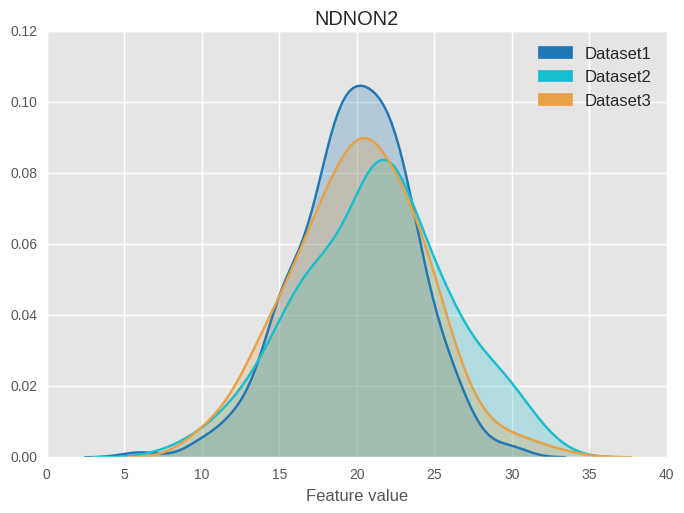

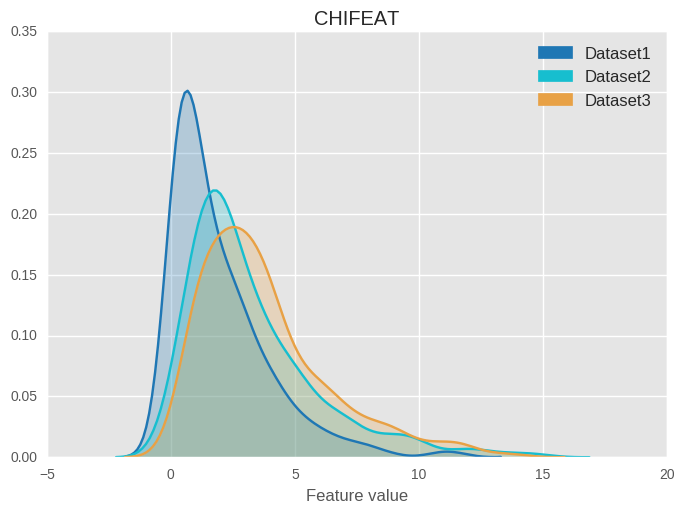

In [11]:
dc.plot_sig_num_feats(datacol, results, boxplot=False)

# Clustering

In [14]:
# columns storing strings; for clustering
str_cols=["CATSIG1"]

# applying the clustering
purity, confusion_m, sig = datacol.hierarchical_clustering(str_cols=str_cols)

# reporting results
print()
print("Cluster purity:", purity)
print("P-value of chi²-test:", sig)
confusion_m

Entries pre incomplete case exclusion: 678
Entries post incomplete case exclusion: 438

Cluster purity: 0.547945205479
P-value of chi²-test: 0.623167509929


,0,1,2
2,115,94,31
3,103,74,21


# MANOVA

In [7]:
dc.manova(datacol, "DATASET", ["NDNON1", "NDNON2", "BATCH2"])

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Multivariate linear model
==================================================================
                                                                  
-------------------------------------------------------------------
         DATASET          Value   Num DF   Den DF   F Value  Pr > F
-------------------------------------------------------------------
           Wilks' lambda  0.9061  3.0000  674.0000  23.2906  0.0000
          Pillai's trace  0.0939  3.0000  674.0000  23.2906  0.0000
  Hotelling-Lawley trace  0.1037  3.0000  674.0000  23.2906  0.0000
     Roy's greatest root  0.1037  3.0000  674.0000  23.2906  0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda   0.0037 3.0000 674.0000 61236.8406 0.0000
         Pillai's trace   0.9963 3.0000 674.0000 61236.8406 0.0000
 Hotelling-Lawley trace 272.5675 3.0000 674.0000 61236.8406 0.0000
    Roy's greatest root 272.5675 3.0000 674.0000 61236.8406 0.0000
==================================================================

"""